# Project 2: Features, Galore: A Linear Regression Analysis on Home Features Predicting Sale Price

---


## Modeling and Hyperparameter Tuning 

This section will implement various Linear Regression models to see how the selected features impacts sale price. 

The first set of models includes two Ordinary Least Squares (OLS) Linear Regression. The first model was implemented with data from all non multi-collinear features. The second model was implemented with non multi-collinear features with a correlation threshold of less than or equal to -0.3 and greater than or equal to 0.3 correlation with sale price.

The second set of models includes two Linear Regression models with Lasso Regularization utilizing GridSearchCV. The first model was implemented with data from all non multi-collinear features. The second model was implemented with non multi-collinear features with a correlation threshold of less than or equal to -0.3 and greater than or equal to 0.3 correlation with sale price.
 
The third set of models includes two Linear Regression models with Ridge Regularization utilizing Cross Validation. The first model was implemented with data from all non multi-collinear features. The second model was implemented with non multi-collinear features with a correlation threshold of less than or equal to -0.3 and greater than or equal to 0.3 correlation with sale price.

Lasso and Ridge model hyperparameters were tuned until alpha values were in an optimal range. Results are displayed below. 

---

In [119]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Lasso, Ridge, RidgeCV
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import mean_squared_error

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
#Read in files 
Z_train=pd.read_csv('../datasets/z_train_cleaned.csv')
Z_test=pd.read_csv('../datasets/z_test_cleaned.csv')
y_train=pd.read_csv('../datasets/y_train_cleaned.csv')
y_test=pd.read_csv('../datasets/y_test_cleaned.csv')

In [4]:
Z_train.head(2)

,Unnamed: 0,id,pid,lot_frontage,lot_area,lot_shape,utilities,land_slope,overall_qual,overall_cond,...,garage_type_CarPort,garage_type_Detchd,misc_feature_Shed,sale_type_CWD,sale_type_Con,sale_type_ConLD,sale_type_ConLI,sale_type_ConLw,sale_type_New,sale_type_WD
0,1957,239,905452110,-0.921358,-0.106446,0.718504,0.0,0.218298,-1.478840,0.389398,...,-0.060652,1.670135,-0.14781,-0.065532,-0.034975,-0.08947,-0.055351,-0.049492,-0.298588,0.395061
1,1966,2443,528315030,0.643738,-0.089214,0.718504,0.0,0.218298,1.337753,-0.505889,...,-0.060652,-0.598754,-0.14781,-0.065532,-0.034975,-0.08947,-0.055351,-0.049492,-0.298588,0.395061


In [5]:
Z_train.rename(columns={"Unnamed: 0": "index"}, inplace=True)

In [6]:
Z_train=Z_train.set_index('index')

In [7]:
Z_train.head()

,id,pid,lot_frontage,lot_area,lot_shape,utilities,land_slope,overall_qual,overall_cond,year_remod/add,...,garage_type_CarPort,garage_type_Detchd,misc_feature_Shed,sale_type_CWD,sale_type_Con,sale_type_ConLD,sale_type_ConLI,sale_type_ConLw,sale_type_New,sale_type_WD
index,,,,,,,,,,,,,,,,,,,,,
1957,239,905452110,-0.921358,-0.106446,0.718504,0.0,0.218298,-1.478840,0.389398,-0.268166,...,-0.060652,1.670135,-0.14781,-0.065532,-0.034975,-0.08947,-0.055351,-0.049492,-0.298588,0.395061
1966,2443,528315030,0.643738,-0.089214,0.718504,0.0,0.218298,1.337753,-0.505889,0.644691,...,-0.060652,-0.598754,-0.14781,-0.065532,-0.034975,-0.08947,-0.055351,-0.049492,-0.298588,0.395061
838,441,528120170,0.399191,0.150689,-1.039629,0.0,0.218298,2.041901,-0.505889,1.029051,...,-0.060652,-0.598754,-0.14781,-0.065532,-0.034975,-0.08947,-0.055351,-0.049492,-0.298588,0.395061
427,1379,905103030,0.545919,0.512571,0.718504,0.0,0.218298,-0.070544,-0.505889,-0.316211,...,-0.060652,-0.598754,-0.14781,-0.065532,-0.034975,-0.08947,-0.055351,-0.049492,-0.298588,0.395061
1489,1218,534428020,-0.040992,0.424550,-1.039629,0.0,0.218298,-1.478840,-0.505889,-1.181023,...,-0.060652,-0.598754,-0.14781,-0.065532,-0.034975,-0.08947,-0.055351,-0.049492,-0.298588,0.395061


In [8]:
Z_test.head()

,Unnamed: 0,id,pid,lot_frontage,lot_area,lot_shape,utilities,land_slope,overall_qual,overall_cond,...,garage_type_CarPort,garage_type_Detchd,misc_feature_Shed,sale_type_CWD,sale_type_Con,sale_type_ConLD,sale_type_ConLI,sale_type_ConLw,sale_type_New,sale_type_WD
0,1475,1640,527252050,-0.383356,-0.328610,-1.039629,0.0,0.218298,2.041901,-0.505889,...,-0.060652,-0.598754,-0.14781,-0.065532,-0.034975,-0.08947,-0.055351,-0.049492,-0.298588,0.395061
1,692,2883,911225110,-0.432266,-0.246671,0.718504,0.0,0.218298,-2.182989,-0.505889,...,-0.060652,-0.598754,-0.14781,-0.065532,-0.034975,-0.08947,-0.055351,-0.049492,-0.298588,0.395061
2,100,1013,527214030,-0.774630,0.915844,-1.039629,0.0,0.218298,2.041901,-0.505889,...,-0.060652,-0.598754,-0.14781,-0.065532,-0.034975,-0.08947,-0.055351,-0.049492,-0.298588,0.395061
3,1826,1713,528172050,0.056827,-0.009134,-1.039629,0.0,0.218298,0.633604,-0.505889,...,-0.060652,-0.598754,-0.14781,-0.065532,-0.034975,-0.08947,-0.055351,-0.049492,-0.298588,0.395061
4,1761,450,528168030,1.328467,0.554469,-1.039629,0.0,0.218298,1.337753,-0.505889,...,-0.060652,-0.598754,-0.14781,-0.065532,-0.034975,-0.08947,-0.055351,-0.049492,-0.298588,0.395061


In [9]:
Z_test.rename(columns={"Unnamed: 0": "index"}, inplace=True)
Z_test=Z_test.set_index('index')

In [10]:
Z_test.head()

,id,pid,lot_frontage,lot_area,lot_shape,utilities,land_slope,overall_qual,overall_cond,year_remod/add,...,garage_type_CarPort,garage_type_Detchd,misc_feature_Shed,sale_type_CWD,sale_type_Con,sale_type_ConLD,sale_type_ConLI,sale_type_ConLw,sale_type_New,sale_type_WD
index,,,,,,,,,,,,,,,,,,,,,
1475,1640,527252050,-0.383356,-0.328610,-1.039629,0.0,0.218298,2.041901,-0.505889,1.029051,...,-0.060652,-0.598754,-0.14781,-0.065532,-0.034975,-0.08947,-0.055351,-0.049492,-0.298588,0.395061
692,2883,911225110,-0.432266,-0.246671,0.718504,0.0,0.218298,-2.182989,-0.505889,-1.661474,...,-0.060652,-0.598754,-0.14781,-0.065532,-0.034975,-0.08947,-0.055351,-0.049492,-0.298588,0.395061
100,1013,527214030,-0.774630,0.915844,-1.039629,0.0,0.218298,2.041901,-0.505889,0.932961,...,-0.060652,-0.598754,-0.14781,-0.065532,-0.034975,-0.08947,-0.055351,-0.049492,-0.298588,0.395061
1826,1713,528172050,0.056827,-0.009134,-1.039629,0.0,0.218298,0.633604,-0.505889,1.029051,...,-0.060652,-0.598754,-0.14781,-0.065532,-0.034975,-0.08947,-0.055351,-0.049492,-0.298588,0.395061
1761,450,528168030,1.328467,0.554469,-1.039629,0.0,0.218298,1.337753,-0.505889,0.932961,...,-0.060652,-0.598754,-0.14781,-0.065532,-0.034975,-0.08947,-0.055351,-0.049492,-0.298588,0.395061


In [11]:
y_train.rename(columns={"Unnamed: 0": "index"}, inplace=True)
y_train=y_train.set_index('index')

In [12]:
y_train.head()

,sale_price
index,
1957,127000
1966,348000
838,300000
427,157500
1489,141000


In [13]:
y_test.rename(columns={"Unnamed: 0": "index"}, inplace=True)
y_test=y_test.set_index('index')

In [14]:
y_test.head(2)

,sale_price
index,
1475,319900
692,78000


In [15]:
Z_train.drop(columns='utilities', inplace=True)
Z_test.drop(columns='utilities', inplace=True)

In [16]:
Z_train=Z_train.drop(columns=['id', 'pid'])
Z_test=Z_test.drop(columns=['id', 'pid'])

## Linear Regression Null Model 

In [19]:
#Baseline
y_train.mean()

sale_price    181428.810629
dtype: float64

In [148]:
Z_train.head()

,lot_frontage,lot_area,lot_shape,land_slope,overall_qual,overall_cond,year_remod/add,exter_qual,exter_cond,bsmt_cond,...,garage_type_CarPort,garage_type_Detchd,misc_feature_Shed,sale_type_CWD,sale_type_Con,sale_type_ConLD,sale_type_ConLI,sale_type_ConLw,sale_type_New,sale_type_WD
index,,,,,,,,,,,,,,,,,,,,,
1957,-0.921358,-0.106446,0.718504,0.218298,-1.478840,0.389398,-0.268166,-0.695900,-0.228933,-1.603284,...,-0.060652,1.670135,-0.14781,-0.065532,-0.034975,-0.08947,-0.055351,-0.049492,-0.298588,0.395061
1966,0.643738,-0.089214,0.718504,0.218298,1.337753,-0.505889,0.644691,1.022332,-0.228933,0.122275,...,-0.060652,-0.598754,-0.14781,-0.065532,-0.034975,-0.08947,-0.055351,-0.049492,-0.298588,0.395061
838,0.399191,0.150689,-1.039629,0.218298,2.041901,-0.505889,1.029051,1.022332,-0.228933,1.847835,...,-0.060652,-0.598754,-0.14781,-0.065532,-0.034975,-0.08947,-0.055351,-0.049492,-0.298588,0.395061
427,0.545919,0.512571,0.718504,0.218298,-0.070544,-0.505889,-0.316211,-0.695900,-0.228933,0.122275,...,-0.060652,-0.598754,-0.14781,-0.065532,-0.034975,-0.08947,-0.055351,-0.049492,-0.298588,0.395061
1489,-0.040992,0.424550,-1.039629,0.218298,-1.478840,-0.505889,-1.181023,-0.695900,-0.228933,0.122275,...,-0.060652,-0.598754,-0.14781,-0.065532,-0.034975,-0.08947,-0.055351,-0.049492,-0.298588,0.395061


## Section 1: OLS Linear Regression
---

### Regular Linear Regression with all non multi-collinear features: 

In [17]:
#Instantiate Model 
lr=LinearRegression()

In [18]:
#Fit LR OLS Model 
lr.fit(Z_train, y_train)

LinearRegression()

In [20]:
#OLS train R2
lr.score(Z_train, y_train)

0.9249133598713408

In [150]:
lr_coef=lr.coef_
lr_coef[0]

array([ 1.55839072e+03,  4.53828288e+03,  1.01048719e+03, -3.37635736e+01,
        1.21282562e+04,  5.39992466e+03,  1.32129187e+03,  6.40337591e+03,
       -6.47244749e+02, -2.96867815e+03,  4.79486042e+03, -3.03435197e+02,
       -1.32314772e+16,  1.74990761e+03, -4.99660649e+15, -1.33659261e+16,
        1.25751252e+16,  1.53243201e+03, -8.73996873e+02, -6.99584339e+01,
        9.16375346e+15,  1.04389170e+16,  1.29717134e+15, -1.17578024e+16,
        1.86620707e+03, -4.17009093e+01,  1.68229919e+03,  2.23828861e+03,
       -4.03318662e+03, -3.20013363e+03,  3.96026480e+03,  1.29568449e+03,
        3.29002939e+03,  1.71205357e+03,  3.73073335e+03,  2.94134639e+02,
        4.57173373e+03, -1.69869921e+03,  1.69521624e+03,  4.27108764e+02,
        2.14219001e+02, -1.63964527e+02, -7.51560392e+02,  1.58442824e+02,
       -5.76574757e+02, -7.85281377e+02, -7.39506598e+02,  3.14221073e+03,
        1.16749421e+02,  3.29502818e+02,  5.76640768e+02, -1.33601149e+03,
        1.97815216e+02, -

In [22]:
lr.intercept_

array([181431.79480831])

In [23]:
#OLS mean squared error 
mean_squared_error(y_train, lr.predict(Z_train))

450972410.9121607

In [24]:
#OLS RMSE
mean_squared_error(y_train, lr.predict(Z_train), squared=False)

21236.111011956986

In [25]:
#OLS test R2
lr.score(Z_test, y_test)

0.8996567042201077

In [26]:
#OLS test MSE
mean_squared_error(y_test, lr.predict(Z_test))

742559926.7166162

In [27]:
#OLS test RMSE
mean_squared_error(y_test, lr.predict(Z_test), squared=False)

27249.952783750217

### Regular Linear Regression with threshold features:

In [54]:
corr_z_train=Z_train[['overall_qual', 'gr_liv_area', 'exter_qual', 'kitchen_qual', 'total_bsmt_sf', 
                     'garage_cars', '1st_flr_sf', 'year_remod/add', 'garage_finish', 'full_bath', 
                     'tot_rms_abv_grd', 'garage_yr_blt', 'fireplaces', 'neighborhood_NridgHt', 'heating_qc', 
                     'bsmt_fin_sf_1', 'has_open_porch', 'bsmt_exposure', 'sale_type_New', 
                     'bsmt_fin_type_1', 'lot_frontage', 'lot_area', 'has_wood_deck', 
                     'mas_vnr_type_Stone', 'garage_type_Detchd', 'foundation_CBlock']]
corr_z_test=Z_test[['overall_qual', 'gr_liv_area', 'exter_qual', 'kitchen_qual', 'total_bsmt_sf', 
                     'garage_cars', '1st_flr_sf', 'year_remod/add', 'garage_finish', 'full_bath', 
                     'tot_rms_abv_grd', 'garage_yr_blt', 'fireplaces', 'neighborhood_NridgHt', 'heating_qc', 
                     'bsmt_fin_sf_1', 'has_open_porch', 'bsmt_exposure', 'sale_type_New', 
                     'bsmt_fin_type_1', 'lot_frontage', 'lot_area', 'has_wood_deck', 
                     'mas_vnr_type_Stone', 'garage_type_Detchd', 'foundation_CBlock']]

In [57]:
#Instantiate Linear Regression 
lrthres=LinearRegression()

In [58]:
#Fit threshold lr 
lrthres.fit(corr_z_train, y_train)

LinearRegression()

In [68]:
lrthres.coef_

array([[17571.82590686, 26730.90942763,  7699.63895316,  5934.54172213,
         7084.29198408,  3599.83711871,   592.8274984 ,  2737.49230042,
         1267.80156395, -2772.15481992,  -847.30097431,  3584.64633317,
         2945.18878116,  5774.80927659,  1776.85777452, 11600.11832743,
        -1501.85495782,  4082.13678732,  5808.16469257,  -540.26314807,
         2384.84043897,  6144.98447325,   147.30960246,  2166.58616509,
          981.71519378,  -130.07671358]])

In [62]:
#Training score 
thres_train_r2=lrthres.score(corr_z_train, y_train)
thres_train_r2

0.887906152937904

In [61]:
#Training test 
thres_test_r2=lrthres.score(corr_z_test, y_test)
thres_test_r2

0.8699410288938401

In [69]:
#RMSE
thres_rmse=mean_squared_error(y_test, lrthres.predict(corr_z_test), squared=False)
thres_rmse

31023.56701123248

---
## Section 2: Lasso Regularization with Grid Search CV 

### Lasso with all non multi-collinear features:

In [28]:
#Instantiate Lasso 
lasso = Lasso(max_iter=10000)

In [29]:
#alpha params
lasso_params = {'alpha': np.logspace(2,4,20)}

In [30]:
#Instantiate Grid Search CV
lasso_grid=GridSearchCV(lasso, lasso_params, n_jobs=-1, cv=10)

In [31]:
lasso_grid.fit(Z_train, y_train)

GridSearchCV(cv=10, estimator=Lasso(max_iter=10000), n_jobs=-1,
             param_grid={'alpha': array([  100.        ,   127.42749857,   162.37767392,   206.91380811,
         263.66508987,   335.98182863,   428.13323987,   545.55947812,
         695.19279618,   885.86679041,  1128.83789168,  1438.44988829,
        1832.98071083,  2335.72146909,  2976.35144163,  3792.69019073,
        4832.93023857,  6158.48211066,  7847.59970351, 10000.        ])})

In [32]:
lasso_grid.best_estimator_

Lasso(alpha=428.13323987193957, max_iter=10000)

In [33]:
lasso_grid.best_params_

{'alpha': 428.13323987193957}

In [34]:
lasso_grid.score(Z_train, y_train)

0.9206303009360988

In [35]:
pd.DataFrame(lasso_grid.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.263945,0.039077,0.010446,0.002928,100.0,{'alpha': 100.0},0.917598,0.901770,0.903652,0.910591,0.874758,0.922227,0.895886,0.907947,0.881655,0.917418,0.903350,0.014756,9
1,0.263524,0.083495,0.019443,0.011946,127.427499,{'alpha': 127.42749857031335},0.917828,0.902916,0.903881,0.911087,0.874413,0.922659,0.896474,0.907794,0.882470,0.917571,0.903709,0.014779,8
2,0.198881,0.025237,0.013049,0.007315,162.377674,{'alpha': 162.3776739188721},0.918096,0.904389,0.904150,0.911629,0.873907,0.923003,0.897105,0.907507,0.883433,0.917416,0.904064,0.014787,6
3,0.149938,0.017315,0.008606,0.002383,206.913808,{'alpha': 206.913808111479},0.918470,0.906047,0.904358,0.912334,0.873671,0.923035,0.897749,0.906962,0.884463,0.917126,0.904422,0.014715,5
4,0.097195,0.010848,0.012849,0.004097,263.66509,{'alpha': 263.6650898730358},0.918858,0.908225,0.904466,0.912979,0.873328,0.922858,0.898269,0.905963,0.885458,0.917017,0.904742,0.014698,3
5,0.086883,0.011996,0.011365,0.002053,335.981829,{'alpha': 335.9818286283781},0.919283,0.910608,0.904690,0.913541,0.872937,0.922441,0.898687,0.904601,0.886204,0.916638,0.904963,0.014729,2
6,0.099963,0.027765,0.023630,0.013222,428.13324,{'alpha': 428.13323987193957},0.919775,0.912820,0.905034,0.913873,0.872677,0.921556,0.898953,0.903004,0.886376,0.916066,0.905013,0.014788,1
7,0.059098,0.010731,0.012247,0.002439,545.559478,{'alpha': 545.559478116852},0.919893,0.914465,0.905157,0.913712,0.872993,0.920145,0.898689,0.900873,0.886023,0.915086,0.904704,0.014693,4
8,0.047768,0.008971,0.011864,0.005184,695.192796,{'alpha': 695.1927961775606},0.919333,0.915738,0.905109,0.913145,0.871785,0.918512,0.898051,0.897783,0.885471,0.913877,0.903880,0.014903,7
9,0.050310,0.007287,0.009335,0.002595,885.86679,{'alpha': 885.8667904100823},0.918500,0.916516,0.904611,0.911522,0.870354,0.916209,0.896831,0.893125,0.883440,0.912032,0.902314,0.015276,10


In [36]:
lasso_train_mse = mean_squared_error(y_train, lasso_grid.predict(Z_train))
lasso_train_mse

476696579.82949877

In [37]:
lasso_train_rmse = mean_squared_error(y_train, lasso_grid.predict(Z_train), squared=False)
lasso_train_rmse

21833.382235226378

In [38]:
lasso_grid.score(Z_test, y_test)

0.8965091417108361

In [39]:
lasso_test_rmse=mean_squared_error(y_test, lasso_grid.predict(Z_test), squared=False)
lasso_test_rmse

27674.040220942283

In [40]:
lasso_grid.best_estimator_.coef_

array([ 1394.11110503,  4347.9498809 ,    35.34592904,    -0.        ,
       12851.61861362,  4082.97847707,  1759.37274572,  6707.2999063 ,
          -0.        , -1931.55367292,  4286.12261727,     0.        ,
        9413.46296115,   631.20529772,     0.        ,    -0.        ,
        8194.15741963,  1352.17655093,    -0.        ,    -0.        ,
         944.79395198,     0.        ,  -757.56275586, 24847.84779522,
        1122.09183138,    -0.        ,   134.92917787,  1520.12639283,
       -2490.82888781, -2454.76490403,  4215.28657015,   265.23161351,
        2738.57772945,  1560.47772672,  3686.18273205,     0.        ,
        4203.06306325,    -0.        ,   874.62045602,     0.        ,
           0.        ,    -0.        ,  -159.03958191,   118.64650732,
          -0.        ,  -289.09147119,  -256.57043116,  2550.83335569,
           0.        ,     0.        ,     0.        ,  -797.60743674,
           0.        ,    -0.        ,    36.97632019,  -539.02008825,
      

### Lasso with threshold features: 

In [70]:
#Instantiate Lasso 
thres_lasso = Lasso(max_iter=10000)

In [75]:
#alpha params
lasso_params = {'alpha': np.logspace(2,3,20)}

In [76]:
#Instantiate Grid Search CV
thres_lasso_grid=GridSearchCV(thres_lasso, lasso_params, n_jobs=-1, cv=10)

In [77]:
#Fitting model 
thres_lasso_grid.fit(corr_z_train, y_train)

GridSearchCV(cv=10, estimator=Lasso(max_iter=10000), n_jobs=-1,
             param_grid={'alpha': array([ 100.        ,  112.88378917,  127.42749857,  143.84498883,
        162.37767392,  183.29807108,  206.91380811,  233.57214691,
        263.66508987,  297.63514416,  335.98182863,  379.26901907,
        428.13323987,  483.29302386,  545.55947812,  615.84821107,
        695.19279618,  784.75997035,  885.86679041, 1000.        ])})

In [78]:
#Best estimator 
thres_lasso_grid.best_estimator_

Lasso(alpha=297.63514416313194, max_iter=10000)

In [80]:
#coef_
thres_lasso_grid.best_estimator_.coef_

array([17573.45075265, 25301.3670442 ,  7827.40151153,  6003.12707635,
        7057.35192534,  3880.96493328,   561.79454275,  2391.04626623,
         865.09630353, -1792.16979984,    -0.        ,  2898.94668786,
        2830.01495328,  5712.88185022,  1677.40064116, 11183.16224493,
        -858.61730204,  4040.20628924,  5662.01912397,    -0.        ,
        2121.39417753,  6008.23838304,     0.        ,  1963.25722002,
         265.74000899,    -0.        ])

In [82]:
#Train score 
thres_lasso_train_r2=thres_lasso_grid.score(corr_z_train, y_train)
thres_lasso_train_r2

0.8875752627056502

In [83]:
#Test R2
thres_lasso_test_r2=thres_lasso_grid.score(corr_z_test, y_test)
thres_lasso_test_r2

0.8687110689780599

In [85]:
#Test RMSE 
thres_lasso_rmse=mean_squared_error(y_test, thres_lasso_grid.predict(corr_z_test), squared=False)
thres_lasso_rmse

31169.915831839426

---

## Section 3: Ridge Regularization with Cross Validation 

### Ridge with all non multi-collinear features: 

In [90]:
#Params 
ridge_param=np.logspace(1, 3, 20)

In [91]:
#Instantiate Ridge CV
ridge_cv = RidgeCV(alphas=ridge_param, scoring='r2', cv=10)

In [92]:
#Fit Ridge CV
ridge_cv.fit(Z_train, y_train)

RidgeCV(alphas=array([  10.        ,   12.74274986,   16.23776739,   20.69138081,
         26.36650899,   33.59818286,   42.81332399,   54.55594781,
         69.51927962,   88.58667904,  112.88378917,  143.84498883,
        183.29807108,  233.57214691,  297.63514416,  379.26901907,
        483.29302386,  615.84821107,  784.75997035, 1000.        ]),
        cv=10, scoring='r2')

In [93]:
#Training R2
ridge_cv_train_score=ridge_cv.score(Z_train, y_train)
ridge_cv_train_score

0.9236701522070221

In [95]:
ridge_cv.alpha_

112.88378916846884

In [94]:
ridge_cv.coef_

array([[ 2.06158684e+03,  4.49182094e+03,  6.66393198e+02,
        -8.07143193e+01,  1.10864775e+04,  4.70128565e+03,
         1.76639642e+03,  6.39972806e+03, -4.40842794e+02,
        -2.28308446e+03,  4.75703935e+03,  4.61776192e+02,
         8.19526116e+03,  1.18907512e+03, -1.58039956e+02,
        -3.62697781e+02,  8.17470637e+03,  1.56842093e+03,
        -5.70114183e+02, -4.63278784e+01,  8.10753131e+03,
         6.91055144e+03, -2.14205610e+02,  1.24305737e+04,
         1.96300911e+03, -1.87730474e+02,  2.48989152e+03,
         2.83678640e+03, -2.96699880e+03, -2.79459126e+03,
         4.45614860e+03,  2.73200404e+03,  2.96595351e+03,
         2.32973109e+03,  3.47287226e+03,  4.13802456e+02,
         4.59040800e+03, -1.18943760e+03,  1.66259477e+03,
         1.96136653e+02,  1.18955969e+02, -7.47086343e+01,
        -7.52619766e+02,  2.33998152e+02, -2.14234620e+02,
        -6.53339734e+02, -5.88019345e+02,  2.95293003e+03,
         1.69475629e+02,  4.30342616e+01,  2.82413601e+0

In [96]:
#Train RMSE
ridge_cv_train_rmse=mean_squared_error(y_train, ridge_cv.predict(Z_train), squared=False)
ridge_cv_train_rmse

21411.192168835823

In [97]:
#Test R2
ridge_cv_test_score=ridge_cv.score(Z_test, y_test)
ridge_cv_test_score

0.8988088141685965

In [98]:
#Test RMSE
ridge_cv_train_rmse=mean_squared_error(y_test, ridge_cv.predict(Z_test), squared=False)
ridge_cv_train_rmse

27364.84018209014

### Ridge with threshold features: 

In [107]:
#ridge thres params 
thres_ridge_param=np.logspace(0, 2, 20)

In [108]:
#Instantiate threshold Ridge CV
thres_ridge_cv = RidgeCV(alphas=thres_ridge_param, scoring='r2', cv=10)

In [109]:
#Fit threshold Ridge CV
thres_ridge_cv.fit(corr_z_train, y_train)

RidgeCV(alphas=array([  1.        ,   1.27427499,   1.62377674,   2.06913808,
         2.6366509 ,   3.35981829,   4.2813324 ,   5.45559478,
         6.95192796,   8.8586679 ,  11.28837892,  14.38449888,
        18.32980711,  23.35721469,  29.76351442,  37.92690191,
        48.32930239,  61.58482111,  78.47599704, 100.        ]),
        cv=10, scoring='r2')

In [110]:
thres_ridge_cv.alpha_

23.357214690901213

In [111]:
#Coefs
thres_ridge_cv.coef_

array([[17227.21053356, 25092.55715638,  7769.32324074,  6038.0076985 ,
         6959.7226516 ,  3726.81409161,  1064.34449177,  2706.17289109,
         1309.43996982, -2366.51966862,   102.65349698,  3427.75593365,
         3173.62715991,  5737.20736202,  1833.14597809, 11265.40407301,
        -1337.39661787,  4104.62851273,  5731.32408723,  -226.09547487,
         2337.46207886,  6125.85567761,   181.36454203,  2113.16469502,
          954.14989183,  -227.87233998]])

In [115]:
#Train score 
thres_ridge_train_r2=thres_ridge_cv.score(corr_z_train, y_train)
thres_ridge_train_r2

0.8877841877959356

In [116]:
#Test score 
thres_ridge_test_r2=thres_ridge_cv.score(corr_z_test, y_test)
thres_ridge_test_r2

0.8697581229667968

In [118]:
#Test RMSE 
thres_ridge_rmse=mean_squared_error(y_test, thres_ridge_cv.predict(corr_z_test), squared=False)
thres_ridge_rmse

31045.374044684202

---

## Results 

#### Null Model 
- Sale price mean: 181428.810629

#### **OLS Linear Regression**: 
##### All Features:
- Train R2 Score: 0.9249133598713408
- Test R2 Score: 0.8996567042201077
- Test RMSE: 27249.952783750217

##### Selected Features: 
- Train R2 Score: 0.887906152937904  
- Test R2 Score: 0.8699410288938401
- Test RMSE: 31023.56701123248
---

#### **Lasso:**
##### All Features:
- Train R2 Score: 0.9206303009360988
- Test R2 Score: 0.8965091417108361
- Test RMSE: 27674.040220942283

##### Selected Features:
- Train R2 Score: 0.8875752627056502
- Test R2 Score: 0.8687110689780599
- Test RMSE: 31169.915831839426
---

#### **Ridge:**
##### All features:
- Train R2 Score: 0.9236701522070221
- Test R2 Score: 0.8988088141685965
- Test RMSE: 27364.84018209014

##### Selected Features: 
- Train R2 Score: 0.8877841877959356
- Test R2 Score: 0.8697581229667968
- Test RMSE: 31045.374044684202
---

All models performed better than the null model. Out of all models, the OLS Linear Regression Model with all features performed the best. This model had the lowest error and explained approximately 90% of the target variable (sale price). This model accounts for 90% of the variation in sale price. This model was the least overfit model, having the lowest bias and variance overall. This model was able to predict sale price within 27,249 (USD).

Selecting features within a specific correlation threshold led to the models being overfit (higher variance due to higher error), because information was lost, making it harder for the model to generalize unseen data. If I had more time I would adjust the correlation threshold to see what the optimal range is. 

## Model Visualization 

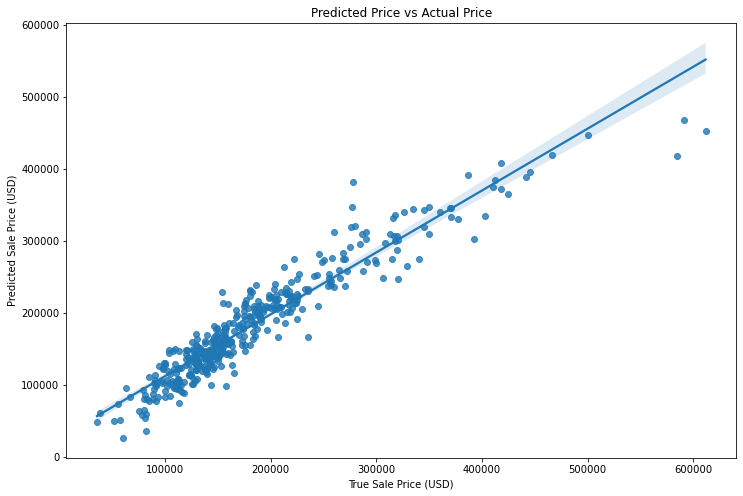

In [125]:
#Linear Regression Model Visualization 

plt.figure(figsize=(12,8))
sns.regplot(x=y_test, y=lr.predict(Z_test))
plt.xlabel('True Sale Price (USD)')
plt.ylabel('Predicted Sale Price (USD)')
plt.title('Predicted Price vs Actual Price');

From this plot we can see that the OLS Linear Regression model does better at predicting prices from 100,000-250,000 range. This model does not do as good of a job predicting sale price at either extremes. From the exploratory data analysis section, we know that most homes sold were in the 100,000-200,000 range. This model may not perform as well due to insignificant training data at the extreames, specifically the higher priced homes. 

In [132]:
resids=y_test-lr.predict(Z_test)

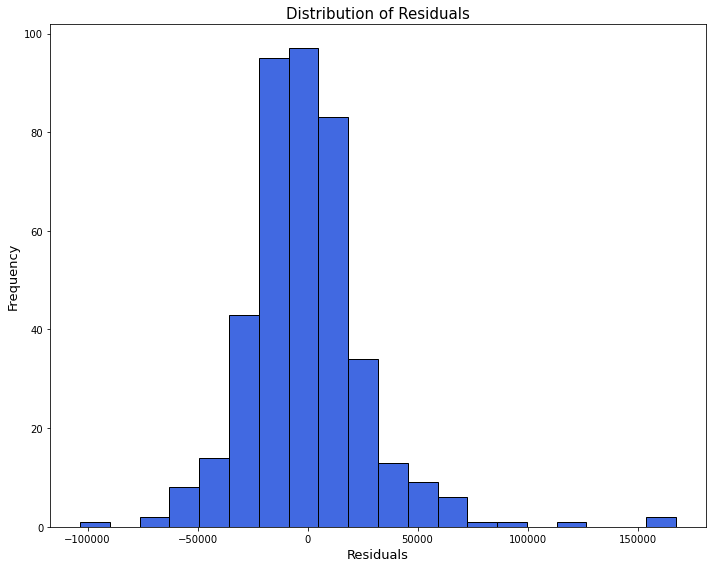

In [133]:
# Residuals histogram 
resids.hist(bins = 20, figsize = (10,8), edgecolor = 'black', grid = False, color = 'royalblue')
plt.title('Distribution of Residuals', fontdict = {'fontsize':15})
plt.xlabel('Residuals', fontdict = {'fontsize':13})
plt.ylabel('Frequency', fontdict = {'fontsize':13})
plt.tight_layout();

The residuals of the OLS Linear Regression Model are not normally distributed. The tails of both ends of the model indicate prediction error at either ends. 

### Displaying Coefficients for OLS Linear Regression 

In [180]:
coef_df=pd.DataFrame(lr_coef[0], Z_test.columns, columns = ['coef']).sort_values(by = 'coef', ascending = False)

In [181]:
coef_df

,coef
total_bsmt_sf,1.257513e+16
ms_sub_class_90,1.199655e+16
2nd_flr_sf,1.043892e+16
1st_flr_sf,9.163753e+15
low_qual_fin_sf,1.297171e+15
...,...
bsmt_fin_sf_2,-4.996606e+15
gr_liv_area,-1.175780e+16
bldg_type_Duplex,-1.199655e+16
bsmt_fin_sf_1,-1.323148e+16


In [183]:
coef_df.reset_index(inplace=True)
coef_df = coef_df.rename(columns = {'index':'features'})

In [172]:
#Wanting to look at entire dataframe
def print_full(x):
    pd.set_option('display.max_rows', len(x))
    print(x)
    pd.reset_option('display.max_rows')

In [186]:
print_full(coef_df)

                 features          coef
0           total_bsmt_sf  1.257513e+16
1         ms_sub_class_90  1.199655e+16
2              2nd_flr_sf  1.043892e+16
3              1st_flr_sf  9.163753e+15
4         low_qual_fin_sf  1.297171e+15
5            overall_qual  1.212826e+04
6    neighborhood_NridgHt  8.949789e+03
7    neighborhood_StoneBr  6.760760e+03
8              exter_qual  6.403376e+03
9           sale_type_New  5.924799e+03
10           overall_cond  5.399925e+03
11          bsmt_exposure  4.794860e+03
12            garage_cars  4.571734e+03
13               lot_area  4.538283e+03
14           kitchen_qual  3.960265e+03
15   exterior_1st_BrkFace  3.795370e+03
16   neighborhood_NoRidge  3.755952e+03
17          garage_yr_blt  3.730733e+03
18             functional  3.290029e+03
19       has_screen_porch  3.142211e+03
20       condition_1_Norm  2.963357e+03
21      roof_matl_WdShngl  2.868467e+03
22           ms_zoning_FV  2.810756e+03
23     mas_vnr_type_Stone  2.739181e+03


In [202]:
#Boolean filter to look at highest and lowest coef
highest_coef=coef_df[(coef_df['coef']>=3.795370e+03) & (coef_df['coef']<=1.297171e+15)]
highest_coef

,features,coef
5,overall_qual,12128.256168
6,neighborhood_NridgHt,8949.788974
7,neighborhood_StoneBr,6760.759540
8,exter_qual,6403.375912
9,sale_type_New,5924.799219
10,overall_cond,5399.924656
11,bsmt_exposure,4794.860422
12,garage_cars,4571.733734
13,lot_area,4538.282875
14,kitchen_qual,3960.264801


In [198]:
#Boolean filter to look at lowest coef
lowest_coef=coef_df[(coef_df['coef']>=-6.142354e+03) & (coef_df['coef']<=-1.512278e+03)]
lowest_coef

,features,coef
136,exterior_2nd_Plywood,-1512.278219
137,neighborhood_OldTown,-1619.261915
138,garage_qual,-1698.699206
139,exterior_2nd_BrkFace,-1705.516931
140,garage_type_2Types,-1709.852326
141,roof_style_Mansard,-2064.277427
142,bsmt_cond,-2968.678155
143,kitchen_abv_gr,-3200.133630
144,bedroom_abv_gr,-4033.186624
145,bldg_type_Twnhs,-4963.398485


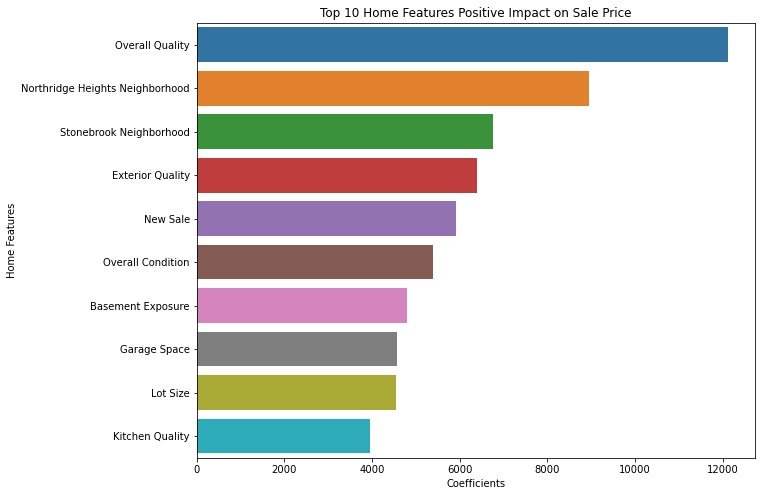

In [256]:
#Barplot for highest coef
plt.figure(figsize=(10,8))
pos=sns.barplot(x=highest_coef['coef'], y=highest_coef['features'])
plt.title('Top 10 Home Features Positive Impact on Sale Price')
labels=['Overall Quality', 'Northridge Heights Neighborhood', 'Stonebrook Neighborhood', 
        'Exterior Quality', 'New Sale', 'Overall Condition', 'Basement Exposure', 'Garage Space', 
        'Lot Size', 'Kitchen Quality']
plt.xlabel('Coefficients')
plt.ylabel('Home Features')
pos.set_yticklabels(labels);

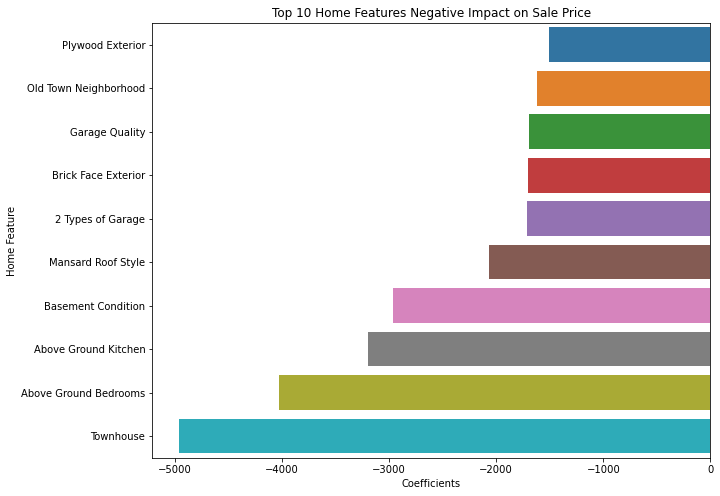

In [255]:
#Barplot for highest coef
plt.figure(figsize=(10,8))
neg=sns.barplot(x=lowest_coef['coef'], y=lowest_coef['features'])
labels=['Plywood Exterior', 'Old Town Neighborhood', 'Garage Quality', 'Brick Face Exterior', 
        '2 Types of Garage', 'Mansard Roof Style', 'Basement Condition', 'Above Ground Kitchen', 
        'Above Ground Bedrooms', 'Townhouse']
plt.title('Top 10 Home Features Negative Impact on Sale Price')
plt.xlabel('Coefficients')
plt.ylabel('Home Feature')
neg.set_yticklabels(labels);

In [221]:
pos_neighborhoods=coef_df.iloc[[6, 7, 16, 28, 29, 38, 51, 55, 56, 58, 62, 77]]

In [222]:
pos_neighborhoods

,features,coef
6,neighborhood_NridgHt,8949.788974
7,neighborhood_StoneBr,6760.759540
16,neighborhood_NoRidge,3755.952218
28,neighborhood_NPkVill,2048.867487
29,neighborhood_BrDale,1898.210362
38,neighborhood_Crawfor,1672.718033
51,neighborhood_Mitchel,1003.046575
55,neighborhood_MeadowV,798.650208
56,neighborhood_BrkSide,771.832589
58,neighborhood_Sawyer,717.008845


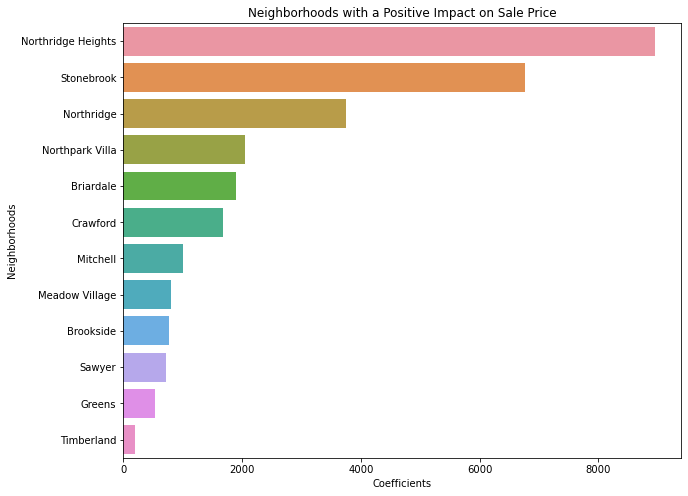

In [253]:
#Barplot for positive neighborhoods 
plt.figure(figsize=(10,8))
ax=sns.barplot(x=pos_neighborhoods['coef'], y=pos_neighborhoods['features'])
plt.title('Neighborhoods with a Positive Impact on Sale Price')
labels = ['Northridge Heights', 'Stonebrook', 'Northridge', 'Northpark Villa', 'Briardale', 'Crawford',
         'Mitchell', 'Meadow Village', 'Brookside', 'Sawyer', 'Greens', 'Timberland']
plt.xlabel('Coefficients')
plt.ylabel('Neighborhoods')
ax.set_yticklabels(labels);